# Load data

In [1]:
import os
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
import tensorflow.keras as K
import keras_tuner as kt

from tensorflow.keras.utils import plot_model
from utils import get_train_data

2022-01-11 10:28:49.397025: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


In [2]:
if sys.platform == "linux":
    physical_devices = tf.config.experimental.list_physical_devices("GPU")
    if len(physical_devices) > 0:
        print('GPU detected')
        tf.config.experimental.set_memory_growth(physical_devices[0], True)

2022-01-11 10:28:52.702037: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-01-11 10:28:53.685374: E tensorflow/stream_executor/cuda/cuda_driver.cc:314] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-01-11 10:28:53.685458: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: andrew-Aspire-A715-41G
2022-01-11 10:28:53.685498: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: andrew-Aspire-A715-41G
2022-01-11 10:28:53.685847: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.86.0
2022-01-11 10:28:53.685967: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.86.0
2022-01-11 10:28:53.685995: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.86.0


In [3]:
X_train, y_train = get_train_data(skip_midpoints=True)

id1_hook_2 reversed: False data shape: (792, 34)
--------------------
id3_hook_1 reversed: False data shape: (1461, 34)
--------------------
id3_hook_2 reversed: False data shape: (1297, 34)
--------------------
id4_hook_1 reversed: False data shape: (1054, 34)
--------------------
id4_hook_2 reversed: False data shape: (1059, 34)
--------------------
id1_hook_1 reversed: False data shape: (858, 34)
--------------------
id2_hook_1 reversed: False data shape: (1013, 34)
--------------------
id0_hook_2 reversed: False data shape: (1051, 34)
--------------------
id0_hook_1 reversed: False data shape: (1100, 34)
--------------------
id2_hook_2 reversed: False data shape: (1041, 34)
--------------------
id3_jab_2 reversed: False data shape: (1164, 34)
--------------------
id4_jab_1 reversed: False data shape: (911, 34)
--------------------
id2_jab_1 reversed: False data shape: (1032, 34)
--------------------
id0_jab_1 reversed: False data shape: (952, 34)
--------------------
id0_jab_2 reve

In [4]:
KEYPOINT_DICT = {
    'nose': 0,
    'left_eye': 1,
    'right_eye': 2,
    'left_ear': 3,
    'right_ear': 4,
    'left_shoulder': 5,
    'right_shoulder': 6,
    'left_elbow': 7,
    'right_elbow': 8,
    'left_wrist': 9,
    'right_wrist': 10,
    'left_hip': 11,
    'right_hip': 12,
    'left_knee': 13,
    'right_knee': 14,
    'left_ankle': 15,
    'right_ankle': 16
}

In [5]:
def format_feature_names(names):
    """"Form list of feature names

    Params:
        names - list of KEYPOINT_DICT keys
        ndims - number of dimensions (x, y, score)
        skip_midpoints - add or omit midpoint coords (x, y, score)

    Returns:
        list of feature names
    """
    feature_names = []
    for name in names:
        feature_names.append(name+'-x')
        feature_names.append(name+'-y')

    return feature_names

In [6]:
feature_names = format_feature_names(list(KEYPOINT_DICT.keys()))

In [7]:
df = pd.DataFrame(data=X_train, columns=feature_names)

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
nose-x,31074.0,-0.220691,0.028890,-0.407440,-0.237477,-0.218163,-0.202571,0.361919
nose-y,31074.0,-0.141959,0.060751,-0.467713,-0.185971,-0.143881,-0.103798,0.475557
left_eye-x,31074.0,-0.232318,0.029956,-0.340721,-0.249898,-0.229959,-0.213657,0.359797
left_eye-y,31074.0,-0.139179,0.064997,-0.480470,-0.186218,-0.144911,-0.101038,0.477576
right_eye-x,31074.0,-0.234061,0.030328,-0.344901,-0.252474,-0.230849,-0.215103,0.359336
right_eye-y,31074.0,-0.133812,0.060529,-0.473905,-0.176613,-0.133870,-0.094512,0.475477
left_ear-x,31074.0,-0.233495,0.029593,-0.444675,-0.252486,-0.232580,-0.214265,0.366997
left_ear-y,31074.0,-0.095097,0.068961,-0.451503,-0.144561,-0.108980,-0.052620,0.474723
right_ear-x,31074.0,-0.238615,0.030643,-0.346178,-0.258294,-0.236333,-0.218362,0.363357
right_ear-y,31074.0,-0.080467,0.056187,-0.465192,-0.115846,-0.075599,-0.042123,0.473494


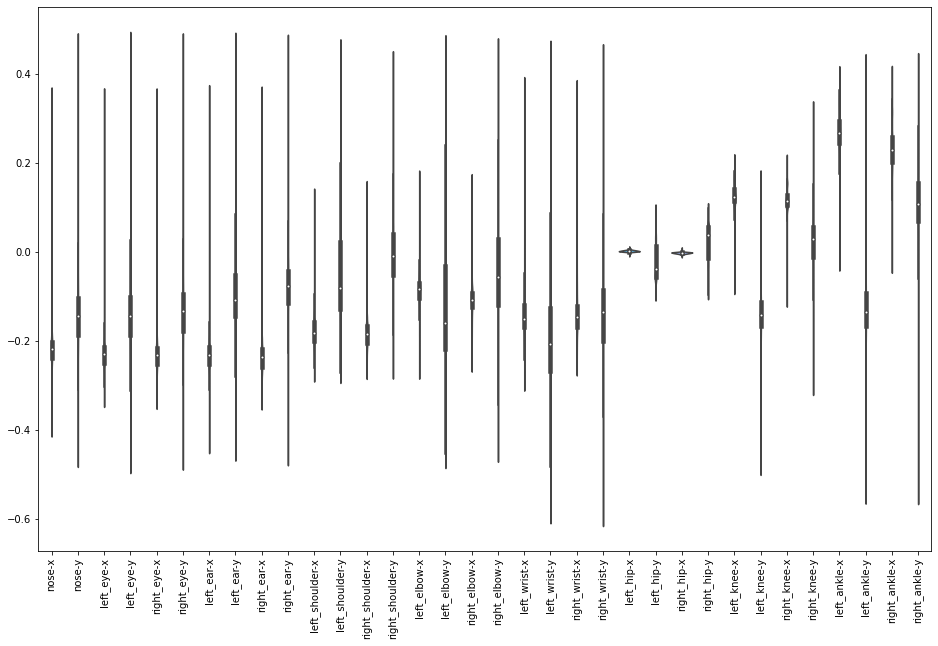

In [9]:
plt.figure(figsize=(16, 10))
ax = sns.violinplot(data=df)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [10]:
time_steps=30 # expect camera 30 fps, so process 1 sample per second
# Number of samples in batch
N_train = X_train.shape[0] // time_steps 

In [11]:
X_train = X_train[:N_train*time_steps].reshape(-1, time_steps, 34)
y_train = y_train[:N_train*time_steps].reshape(-1, time_steps, 1)
X_train.shape

(1035, 30, 34)

## GRU

In [12]:
y_train = K.utils.to_categorical(y_train, num_classes=7)
X_train = tf.constant(X_train)

2022-01-11 10:29:18.866797: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-11 10:29:18.898157: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 2295695000 Hz
2022-01-11 10:29:18.899137: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x61895c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-01-11 10:29:18.899207: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


In [13]:
def model_builder(hp):
    # Hyperparams
    hp_ru1 = hp.Int('recurrent_units1', min_value=16, max_value=128, step=8)
    hp_ru2 = hp.Int('recurrent_units2', min_value=16, max_value=128, step=8)

    hp_du1 = hp.Int('units1', min_value=16, max_value=128, step=8)
    hp_du2 = hp.Int('units2', min_value=16, max_value=128, step=8)

    hp_reg1 = hp.Float('dense_reg1', min_value=1e-4, max_value=1e-2)
    hp_reg2 = hp.Float('dense_reg2', min_value=1e-4, max_value=1e-2)
    
    hp_dp1 = hp.Float('rec_dropout1', min_value=0., max_value=0.4)
    hp_dp2 = hp.Float('rec_dropout2', min_value=0., max_value=0.4)

    hp_dl_dp = hp.Float('dropout', min_value=0., max_value=0.4)

    hp_rec_dp1 = hp.Float('rec_dropout1', min_value=0., max_value=0.4)
    hp_rec_dp2 = hp.Float('rec_dropout2', min_value=0., max_value=0.4)

    hp_kernel_reg1 = hp.Float('kernel_reg1', min_value=1e-5, max_value=1e-3, sampling='log')
    hp_kernel_reg2 = hp.Float('kernel_reg2', min_value=1e-5, max_value=1e-3, sampling='log')

    hp_recur_reg1 = hp.Float('recur_reg1', min_value=1e-5, max_value=1e-3, sampling='log')
    hp_recur_reg2 = hp.Float('recur_reg2', min_value=1e-5, max_value=1e-3, sampling='log')

    hp_act_reg1 = hp.Float('act_reg1', min_value=1e-5, max_value=1e-3, sampling='log')
    hp_act_reg2 = hp.Float('act_reg2', min_value=1e-5, max_value=1e-3, sampling='log')

    hp_add_another_gru_layer = hp.Boolean('add_another_gru_layer')
 
    hp_learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2)

    layers = []
    
    # Model
    kernel_reg1 = K.regularizers.l2(hp_kernel_reg1)
    kernel_reg2 = K.regularizers.l2(hp_kernel_reg2)

    recurrent_reg1 = K.regularizers.l2(hp_recur_reg1)
    recurrent_reg2 = K.regularizers.l2(hp_recur_reg2)

    act_reg1 = K.regularizers.l2(hp_act_reg1)
    act_reg2 = K.regularizers.l2(hp_act_reg2)

    model = K.Sequential()
    model.add(K.layers.LayerNormalization(axis=1))
    model.add(K.layers.GRU(hp_ru1,
                        # stateful=True, # mutable states not supported in tflite 
                        return_sequences=True,
                        kernel_regularizer=kernel_reg1,
                        recurrent_regularizer=recurrent_reg1,
                        activity_regularizer=act_reg1,
                        dropout=hp_dp1,
                        recurrent_dropout=hp_rec_dp1
                    ))

    if hp_add_another_gru_layer:
        model.add(K.layers.GRU(hp_ru2,
                            # stateful=True, # mutable states not supported in tflite 
                            return_sequences=True,
                            kernel_regularizer=kernel_reg2,
                            recurrent_regularizer=recurrent_reg2,
                            activity_regularizer=act_reg2,
                            dropout=hp_dp2,
                            recurrent_dropout=hp_rec_dp2
                        ))

    model.add(K.layers.Dense(hp_du1, activation='relu',
                            kernel_regularizer=K.regularizers.l2(hp_reg1)))
    model.add(K.layers.Dropout(hp_dl_dp))
    model.add(K.layers.Dense(hp_du2, activation='relu',
                            kernel_regularizer=K.regularizers.l2(hp_reg2))) 
    model.add(K.layers.Dense(7, activation='sigmoid'))

    model.compile(optimizer=K.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [14]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=32,
                     directory='kt_dir',
                     project_name='punch_dl_kt_gru')

stop_early = K.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(X_train, y_train, batch_size=4, validation_split=0.4, epochs=32, shuffle=False, callbacks=[stop_early])

Trial 91 Complete [00h 01m 51s]
val_accuracy: 0.6964573264122009

Best val_accuracy So Far: 0.7110306024551392
Total elapsed time: 00h 09m 43s
INFO:tensorflow:Oracle triggered exit


In [15]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

best_hps.values

{'recurrent_units1': 104,
 'recurrent_units2': 40,
 'units1': 128,
 'units2': 104,
 'dense_reg1': 0.00655949286873307,
 'dense_reg2': 0.008548279765509143,
 'rec_dropout1': 0.12350433549445992,
 'rec_dropout2': 0.3734877046669231,
 'dropout': 0.08339652015177923,
 'kernel_reg1': 0.0004460408551726881,
 'kernel_reg2': 0.00036135657113665144,
 'recur_reg1': 3.5492899304676664e-05,
 'recur_reg2': 2.3989672989971263e-05,
 'act_reg1': 1.4428841158677676e-05,
 'act_reg2': 2.4517057540484427e-05,
 'add_another_gru_layer': False,
 'learning_rate': 0.004401867534162911,
 'tuner/epochs': 32,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [16]:
# Build the model with the optimal hyperparameters and train it on the data for 64 epochs
model = tuner.hypermodel.build(best_hps)

In [18]:
history = model.fit(X_train, y_train, batch_size=1, 
                    validation_split=0.4, 
                    epochs=48,
                    shuffle=False,
                    callbacks=[
                        K.callbacks.ReduceLROnPlateau(),
                        K.callbacks.ModelCheckpoint(filepath='checkpoints/gru', save_weights_only=True)
                    ])

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/48
621/621 [==============================] - 21s 34ms/step - loss: 1.2693 - accuracy: 0.4555 - val_loss: 2.5273 - val_accuracy: 0.4523
Epoch 2/48
621/621 [==============================] - 18s 30ms/step - loss: 1.1399 - accuracy: 0.4865 - val_loss: 2.6808 - val_accuracy: 0.4685
Epoch 3/48
621/621 [==============================] - 19s 30ms/step - loss: 1.0900 - accuracy: 0.5761 - val_loss: 2.7832 - val_accuracy: 0.5961
Epoch 4/48
621/621 [==============================] - 19s 30ms/step - loss: 1.1064 - accuracy: 0.6555 - val_loss: 2.6913 - val_accuracy: 0.6384
Epoch 5/48
621/621 [==============================] - 19s 30ms/step - loss: 0.9752 - accuracy: 0.7529 - val_loss: 2.5855 - val_accuracy: 0.6592
Epoch 6/48
621/621 [==============================] - 19s 30ms/step - loss: 0.9645 - accuracy: 0.7393 - val_loss: 2.7389 - val_accuracy: 0.6398
Epoch 7/48
621/621 [==============================] - 20s 32ms/step - loss: 0.9250 - accuracy: 0.7615 - val_loss: 2.6451 - val_accuracy:

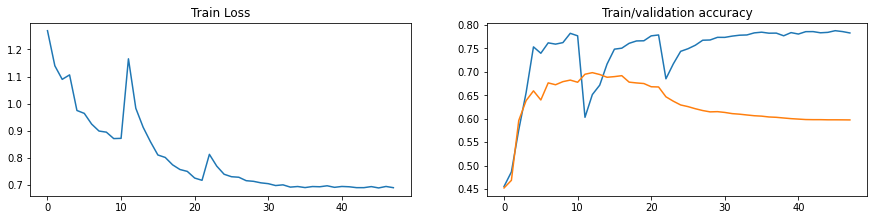

In [19]:
plt.figure(figsize=(15, 7))
plt.subplot(221)
plt.title("Train Loss")
plt.plot(history.history['loss'])
plt.subplot(222)
plt.title("Train/validation accuracy")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# Conclusion 

We need more data to avoid overfitting

# Convert the model

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model) 

tflite_model = converter.convert()

In [ ]:
# Save the model.
with open('models/model_gru.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
# Run the model with TensorFlow to get expected results.
TEST_CASES = 10
x = tf.reshape(X_val, (-1, time_steps, 34))
# Run the model with TensorFlow Lite
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

for i in range(TEST_CASES):
    expected = model.predict(x[i:i+1])
    interpreter.set_tensor(input_details[0]["index"], x[i:i+1])
    interpreter.invoke()
    result = interpreter.get_tensor(output_details[0]["index"])

    # Assert if the result of TFLite model is consistent with the TF model.
    np.testing.assert_almost_equal(expected, result, decimal=5)
    print("Done. The result of TensorFlow matches the result of TensorFlow Lite.")

    # Please note: TfLite fused Lstm kernel is stateful, so we need to reset
    # the states.
    # Clean up internal states.
    interpreter.reset_all_variables()

# Moving most frequent smoothing

In [ ]:
y_pred = np.argmax(model(x).numpy(), axis=-1).ravel()
y_val_np = np.concatenate(y_val_list)[:N_val*time_steps]

In [ ]:
# [1,1,1,1,3,3,1,1] -> [1]
# moving window across padded y_pred
# output element is most frequent in window

win_size = time_steps // 2
mf_smooth = np.zeros(y_pred.shape[0]+win_size)
for i in range(len(y_pred) - win_size):
    window = y_pred[i:i+win_size]
    bins = np.bincount(window)
    mf_smooth[i+win_size//2] = np.argmax(bins)

mf_smooth = mf_smooth[:-win_size]

In [ ]:
len(mf_smooth), len(y_pred), len(y_val_np)

In [ ]:
print(np.mean(y_val_np==y_pred))
print(np.mean(y_val_np==mf_smooth))

In [ ]:
plt.figure(figsize=(16, 12))

plt.subplot(3, 1, 1)
plt.title('Original')
plt.plot(y_val_np[:600])

plt.subplot(3, 1, 2)
plt.title('Prediction')
plt.plot(y_pred[:600])

plt.subplot(3, 1, 3)
plt.title('Smoothed prediction')
plt.plot(mf_smooth[:600])


Thanks to:  
https://github.com/keras-team/keras-tuner